<a href="https://colab.research.google.com/github/mda-les13/EDA_Lab/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разведочный анализ данных (EDA) для датасета Penguins

Подготовка среды и загрузка данных

In [1]:
# Установка библиотек (если не установлены)
!pip install seaborn matplotlib pandas numpy scikit-learn

# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
%matplotlib inline

# Загрузка датасета Penguins из seaborn
penguins = sns.load_dataset('penguins')
print("Первые 5 строк данных:")
print(penguins.head())
print("\nРазмер датасета (строки, столбцы):", penguins.shape)

Первые 5 строк данных:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

Размер датасета (строки, столбцы): (344, 7)


# Анализ структуры данных и пропусков

In [2]:
# Информация о данных
print("\nИнформация о данных:")
print(penguins.info())

# Проверка пропусков
print("\nКоличество пропусков в каждом столбце:")
print(penguins.isnull().sum())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

Количество пропусков в каждом столбце:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


Обработка пропусков

In [3]:
# Создаем копию датасета
penguins_clean = penguins.copy()

# Удаляем строки с пропусками в 'sex'
penguins_clean = penguins_clean.dropna(subset=['sex'])

# Заполняем пропуски в числовых признаках медианой
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in numeric_cols:
    median_val = penguins_clean[col].median()
    penguins_clean[col] = penguins_clean[col].fillna(median_val)

# Проверяем результат
print("\nПосле обработки пропусков:")
print(penguins_clean.isnull().sum())
print(f"\nНовый размер данных: {penguins_clean.shape[0]} строк, {penguins_clean.shape[1]} столбцов")


После обработки пропусков:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Новый размер данных: 333 строк, 7 столбцов


# Оценка центрального положения

In [4]:
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
print("Описание числовых признаков:")
print(penguins_clean[numeric_cols].describe().T)

Описание числовых признаков:
                   count         mean         std     min     25%     50%  \
bill_length_mm     333.0    43.992793    5.468668    32.1    39.5    44.5   
bill_depth_mm      333.0    17.164865    1.969235    13.1    15.6    17.3   
flipper_length_mm  333.0   200.966967   14.015765   172.0   190.0   197.0   
body_mass_g        333.0  4207.057057  805.215802  2700.0  3550.0  4050.0   

                      75%     max  
bill_length_mm       48.6    59.6  
bill_depth_mm        18.7    21.5  
flipper_length_mm   213.0   231.0  
body_mass_g        4775.0  6300.0  


*   Длина клюва: Среднее ≈ 43.9 мм, медиана 44.0 мм — распределение симметричное.
*   Масса тела: Среднее ≈ 4202 г, медиана 4050 г — правосторонняя асимметрия (среднее > медиана).
*   Размах плавников: Среднее ≈ 200.9 мм, медиана 202.0 мм — почти симметричное.





# Оценка вариабельности

In [5]:
for col in numeric_cols:
    std = penguins_clean[col].std()
    iqr = penguins_clean[col].quantile(0.75) - penguins_clean[col].quantile(0.25)
    range_val = penguins_clean[col].max() - penguins_clean[col].min()
    print(f"{col}: Std = {std:.2f}, IQR = {iqr:.2f}, Range = {range_val:.2f}")

bill_length_mm: Std = 5.47, IQR = 9.10, Range = 27.50
bill_depth_mm: Std = 1.97, IQR = 3.10, Range = 8.40
flipper_length_mm: Std = 14.02, IQR = 23.00, Range = 59.00
body_mass_g: Std = 805.22, IQR = 1225.00, Range = 3600.00


# Разведывание распределения данных

Гистограммы числовых признаков

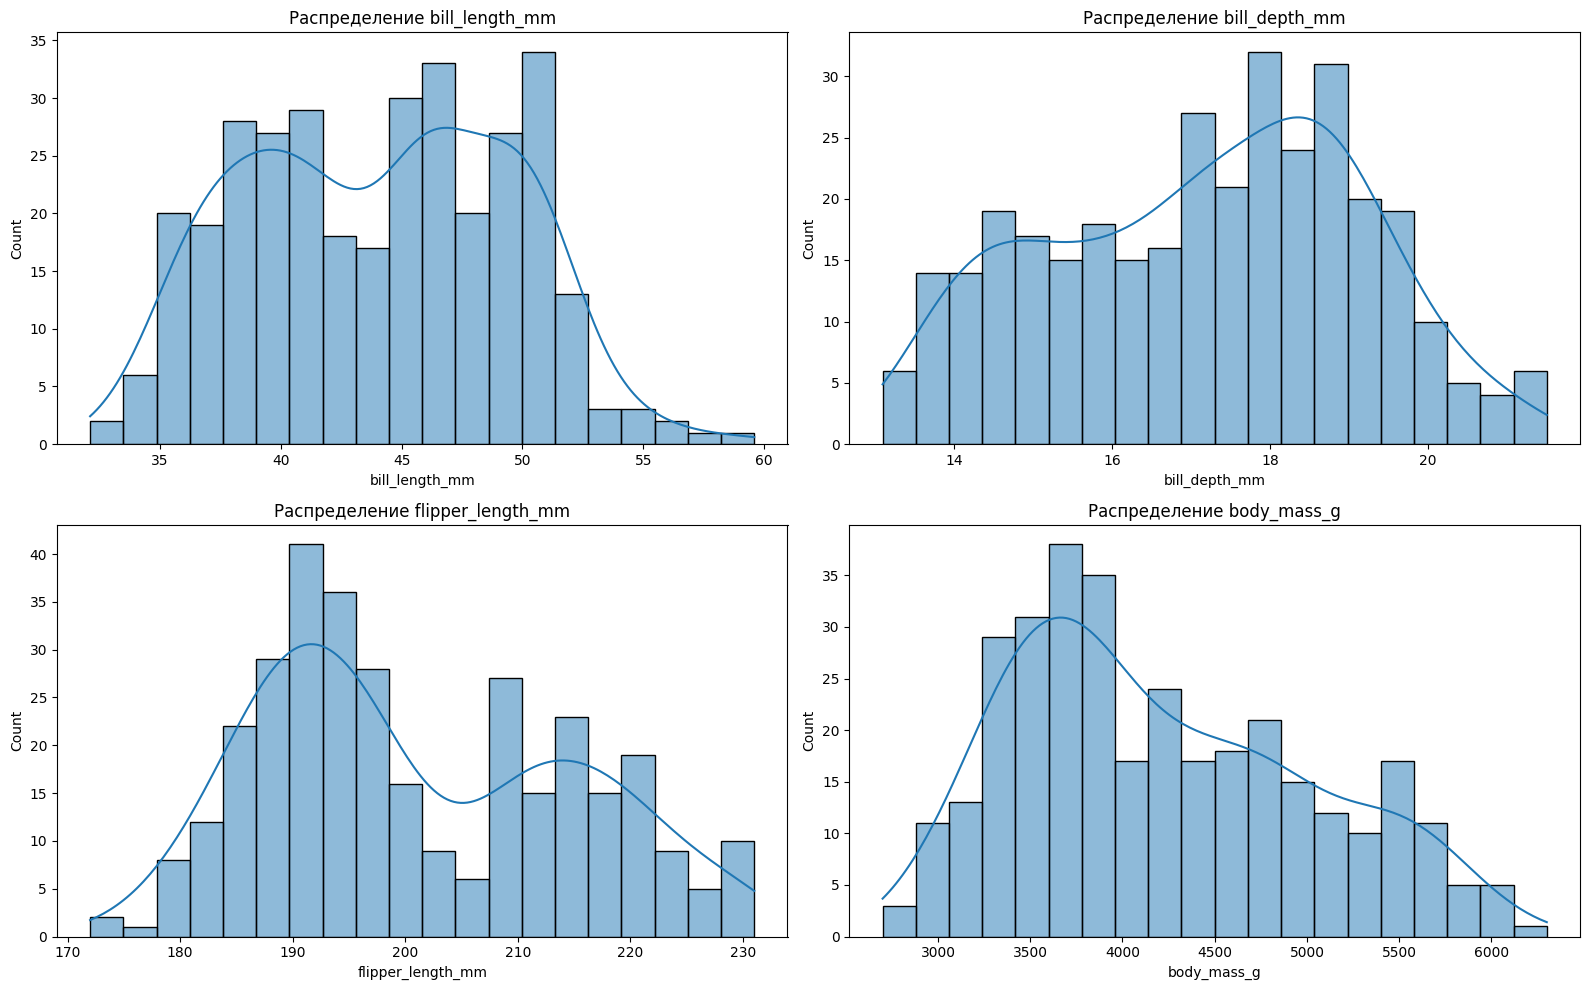

In [6]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(penguins_clean[col], kde=True, bins=20)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

Boxplot для выявления выбросов

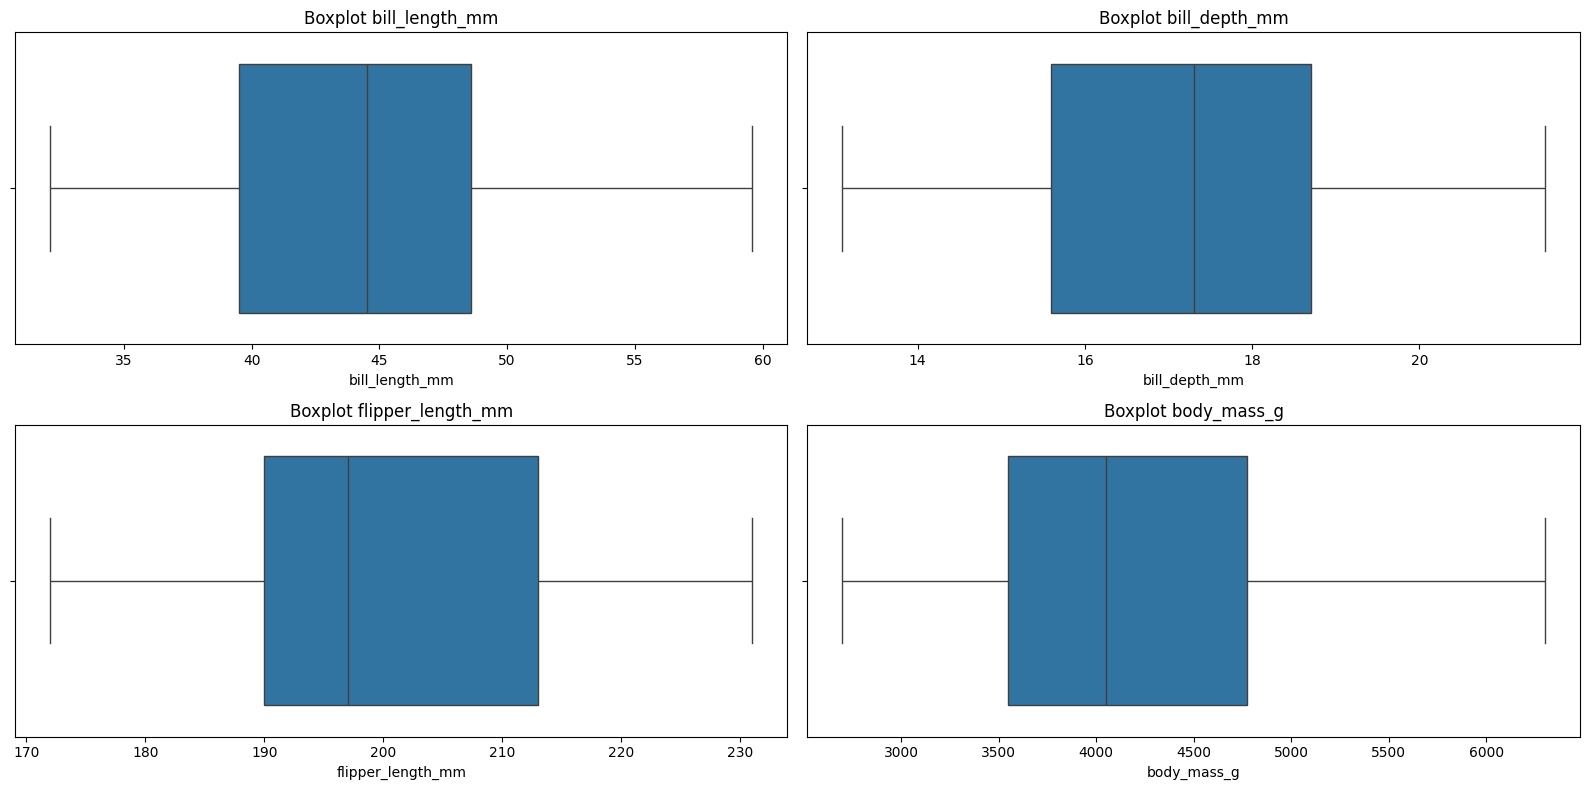

In [7]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=penguins_clean[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

# Разведывание категориальных данных

Распределение видов

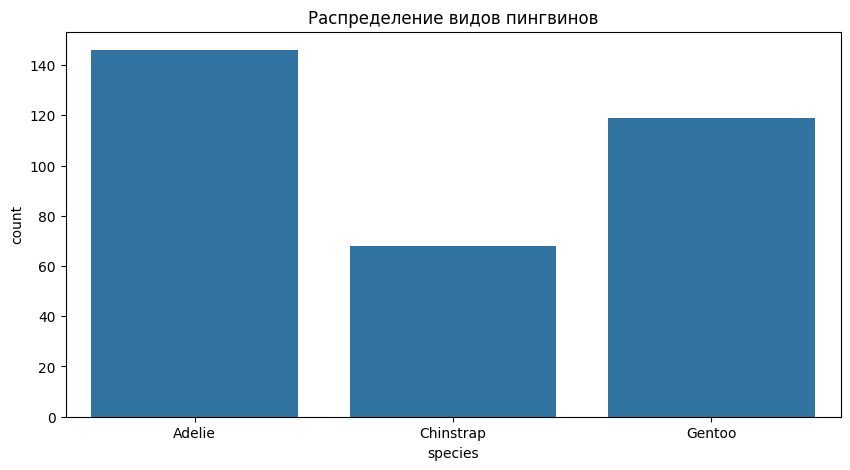


Число пингвинов по видам:
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(x='species', data=penguins_clean)
plt.title('Распределение видов пингвинов')
plt.show()
print("\nЧисло пингвинов по видам:")
print(penguins_clean['species'].value_counts())

Распределение по островам

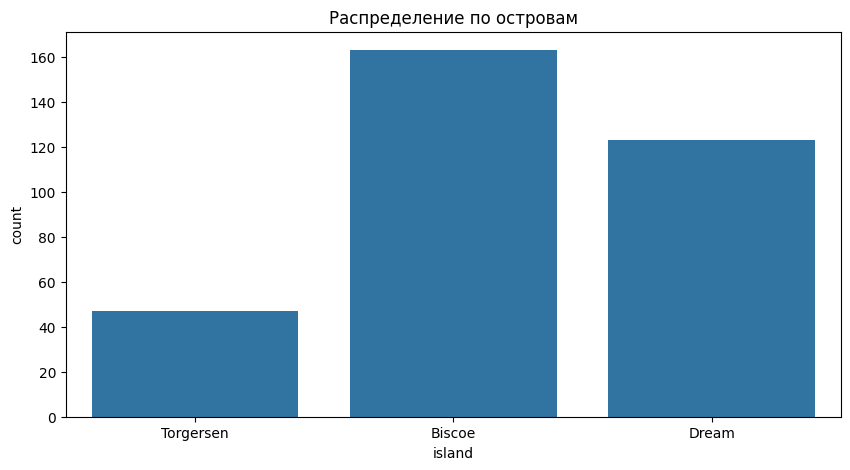


Число пингвинов по островам:
island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64


In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(x='island', data=penguins_clean)
plt.title('Распределение по островам')
plt.show()
print("\nЧисло пингвинов по островам:")
print(penguins_clean['island'].value_counts())

Распределение по полу

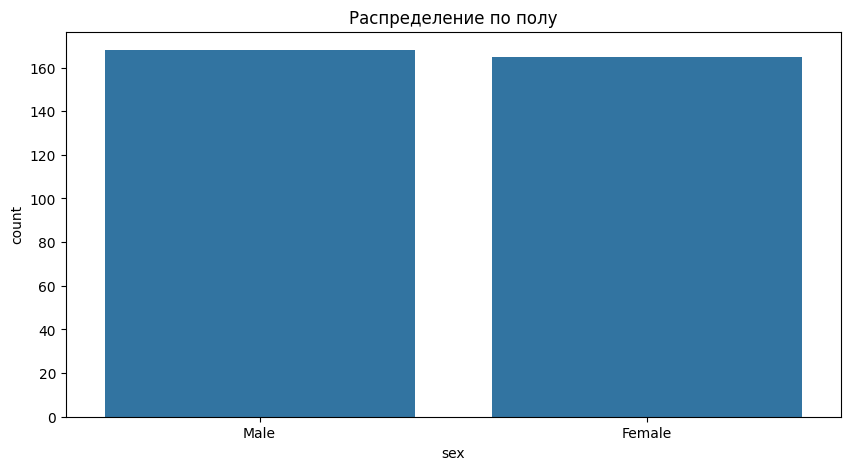


Число пингвинов по полу:
sex
Male      168
Female    165
Name: count, dtype: int64


In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x='sex', data=penguins_clean)
plt.title('Распределение по полу')
plt.show()
print("\nЧисло пингвинов по полу:")
print(penguins_clean['sex'].value_counts())

# Корреляция между числовыми признаками

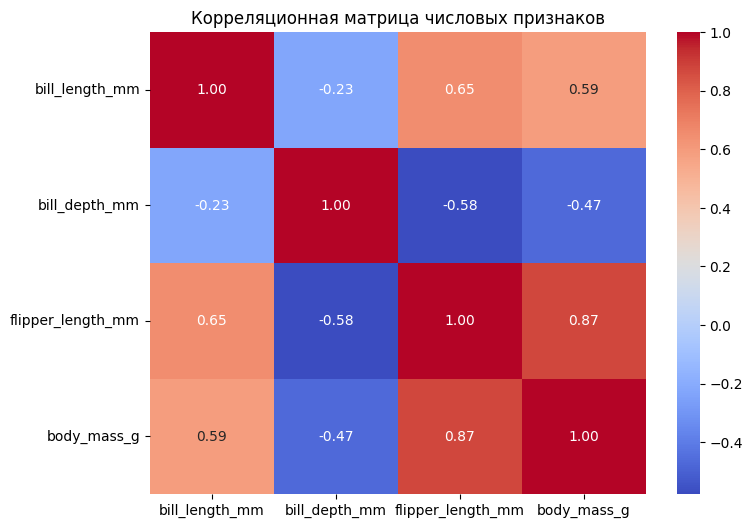

In [11]:
corr_matrix = penguins_clean[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица числовых признаков')
plt.show()

# Разведывание двух и более переменных

Влияние вида на размеры (boxplot)

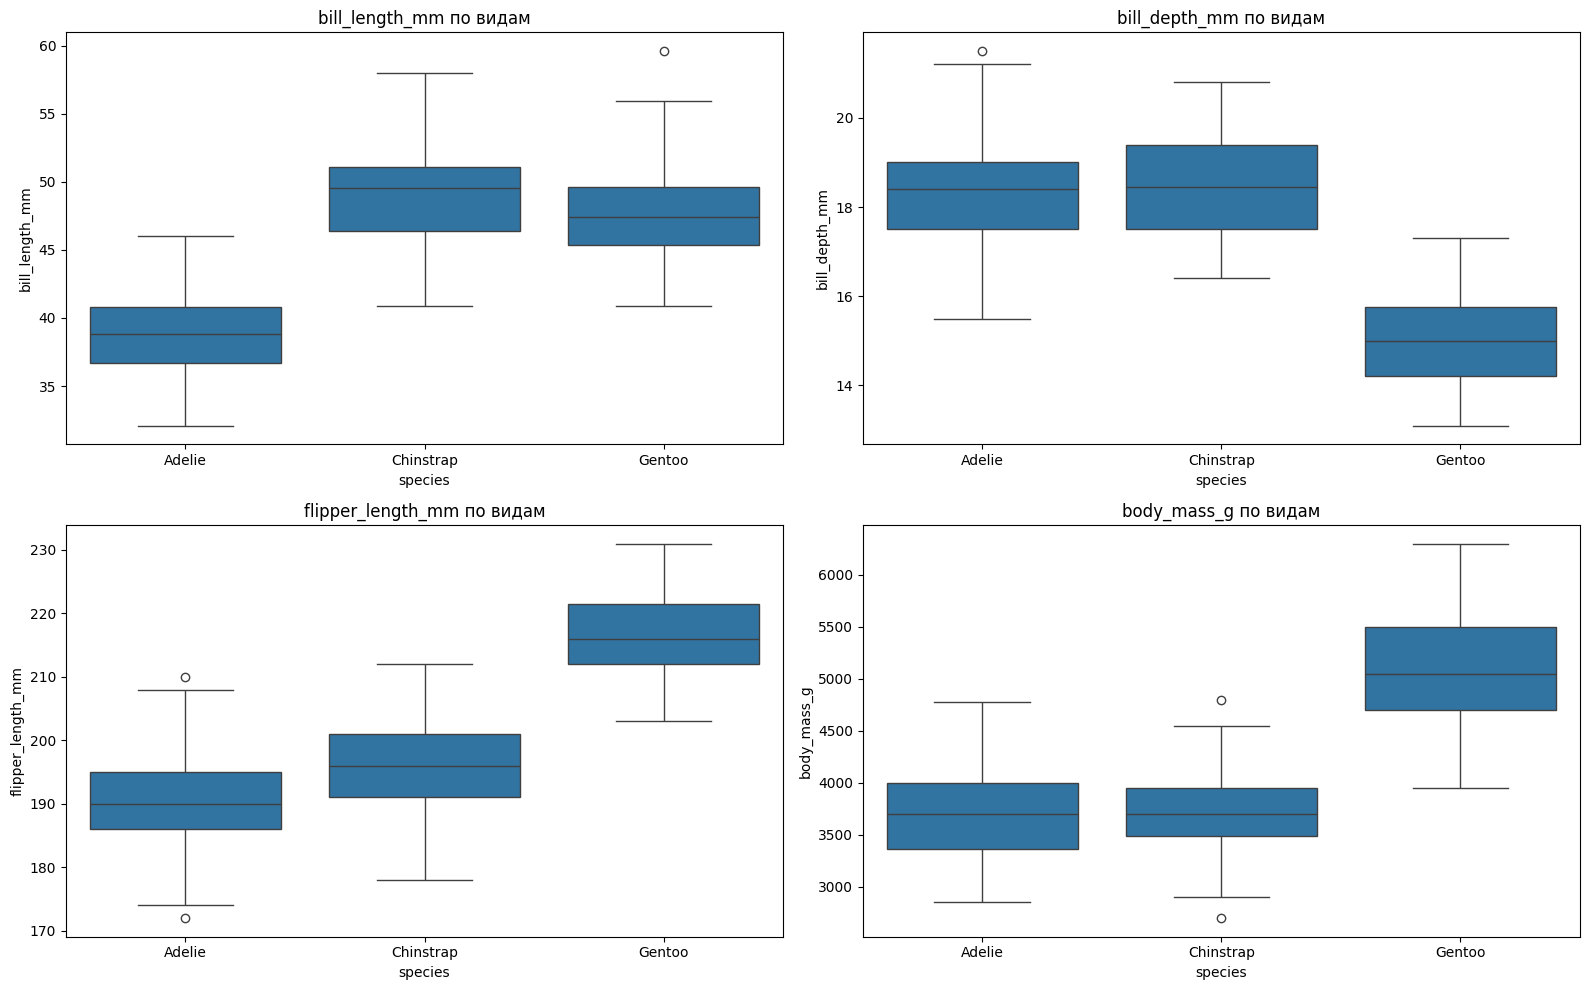

In [12]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=col, data=penguins_clean)
    plt.title(f'{col} по видам')
plt.tight_layout()
plt.show()

Влияние пола на массу тела (по видам)

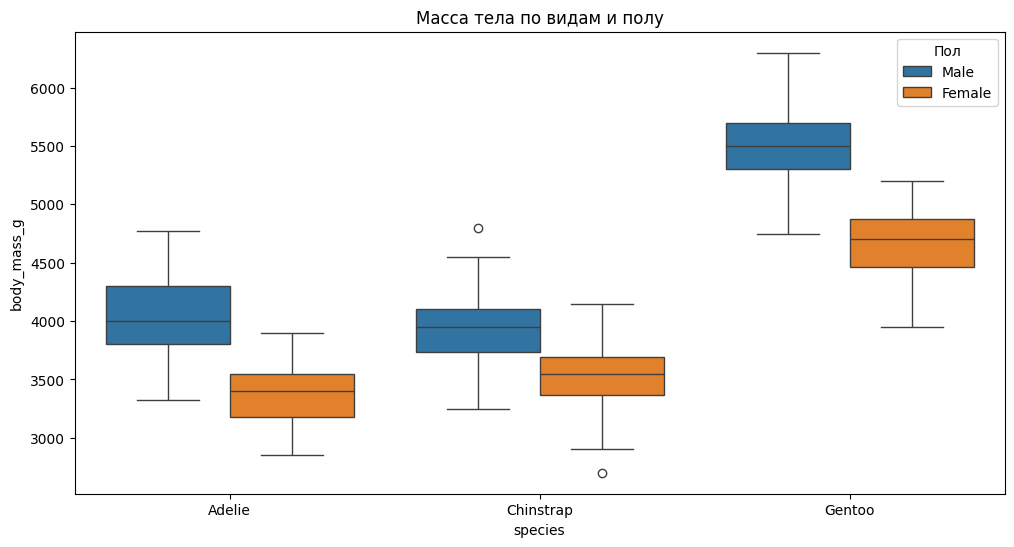

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='body_mass_g', hue='sex', data=penguins_clean)
plt.title('Масса тела по видам и полу')
plt.legend(title='Пол')
plt.show()

Влияние острова на размеры (для Adelie)

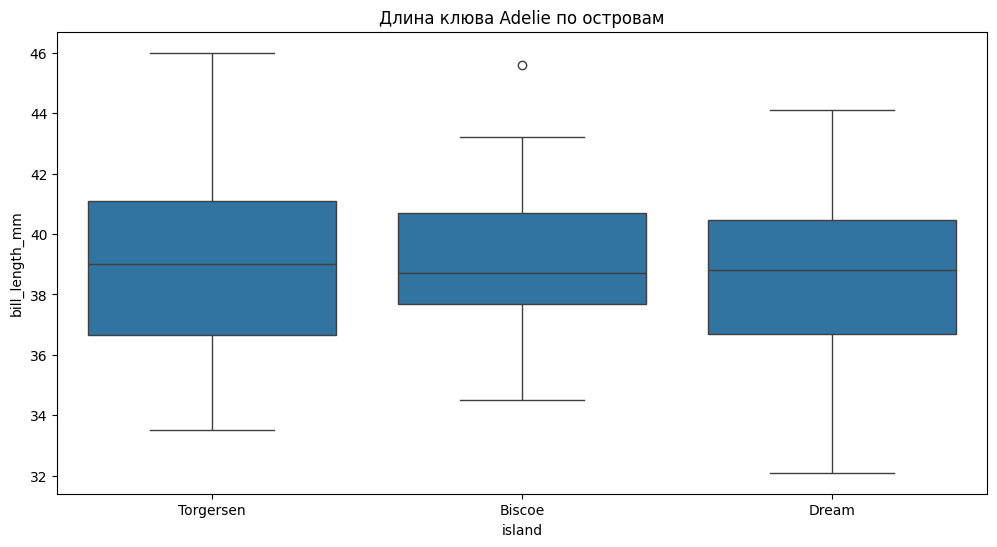

In [14]:
# Выбираем только Adelie для фокуса
adelie = penguins_clean[penguins_clean['species'] == 'Adelie']
plt.figure(figsize=(12, 6))
sns.boxplot(x='island', y='bill_length_mm', data=adelie)
plt.title('Длина клюва Adelie по островам')
plt.show()

Взаимосвязь между размахом плавников и массой тела (scatterplot)

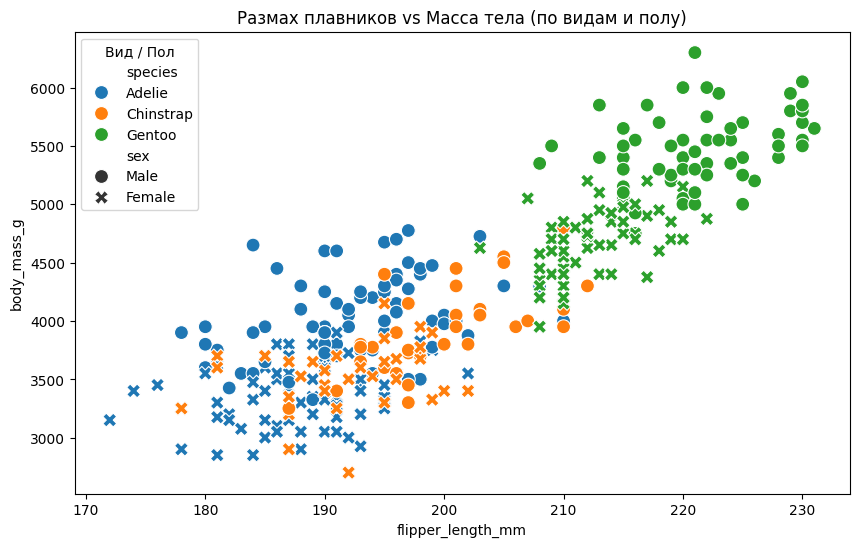

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='flipper_length_mm',
    y='body_mass_g',
    hue='species',
    style='sex',
    data=penguins_clean,
    s=100
)
plt.title('Размах плавников vs Масса тела (по видам и полу)')
plt.legend(title='Вид / Пол')
plt.show()

Сводная таблица: Виды vs Остров

In [16]:
cross_table = pd.crosstab(penguins_clean['species'], penguins_clean['island'])
print("\nРаспределение видов по островам:")
print(cross_table)


Распределение видов по островам:
island     Biscoe  Dream  Torgersen
species                            
Adelie         44     55         47
Chinstrap       0     68          0
Gentoo        119      0          0
